#Problem Statement

**Context:**

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help



**Objective**

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.



**Data Description**

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

**Data Dictionary**

Sl_No: Primary key of the records
Customer Key: Customer identification number
Average Credit Limit: Average credit limit of each customer for all credit cards
Total credit cards: Total number of credit cards possessed by the customer
Total visits bank: Total number of visits that the customer made (yearly) personally to the bank
Total visits online: Total number of visits or online logins made by the customer (yearly)
Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

#Importing the Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Loading the dataset

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Credit Card Customer Data.xlsx')
df = data.copy()

#Overview of the Dataset

##Loading the First 5 Rows of the dataset

In [ ]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


##Loading the Last 5 Rows of the dataset

In [ ]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


##Checking the shape of the datatset

In [ ]:
print(f'The shape of the dataset is: {df.shape}')

The shape of the dataset is: (660, 7)


- We have 660 rows and 7 columns present in the dataset

## Checking the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- We can clearly see that the we don't have any null values in the dataset.
- The datatype present in the datset is int64 so all the columns are numerical.
- We don't have any object or categorical datatypes present in the dataset.

##Statistical summary of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


- `Sl_No` and `Customer Key` are numerical but they are categorical by nature.
- `Avg_Credit_Limit` have a mean value as 34574.24 and the median value is 18000 so we can clearly say that right skewed. The maxmimum value present is 200000.0 we might have some outliers here.
- `Total_Credit_Cards` we have mean value of 4.7 and the media is 5 which conveys the distribution is normal, the minimum and maximum values range from 1 to 10.
- `Total_visits_bank` the mean value is 2.4 and the median is 2, the minimum and maximum value ranges from 0 to 5.
- `Total_visits_online` the mean value is 2.6 and the median is 2, the minimum and maximum value ranges from 0 to 15.
- `Total_calls_made` the mean value is 3.58 and the median is 3, the minimum and maximum value ranges from 0 to 10.

##Checking for null values present in the dataset

In [ ]:
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


- We don't have any null values in the dataset it is clean.

##Checking for duplicate values present in the dataset

In [ ]:
print(f'The number of duplicates present: {df.duplicated().sum()}')

The number of duplicates present: 0


- There are no Duplicate values present in the dataset.

In [ ]:
df['Customer Key'].duplicated().value_counts()

,count
Customer Key,
False,655
True,5


- We are having duplicate valus in `Customer Key` column. But it is okay since the same customer boug

In [ ]:
df.nunique()

,0
Sl_No,660
Customer Key,655
Avg_Credit_Limit,110
Total_Credit_Cards,10
Total_visits_bank,6
Total_visits_online,16
Total_calls_made,11


In [ ]:
df[df['Customer Key'].duplicated(keep = False)]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


- Te values we have are not duplicates they are either typos or wrongly entered.
- Since the `Customer Key` Column values are unique, We will be removing the Customer column so we will leave it as it is.

#Data preprocesing

##Removing `Sl No` column

In [ ]:
df.drop('Sl_No', axis = 1, inplace = True)

In [ ]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


#Exploratory Data Analysis


##Functions for plotting

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##Univariate Analysis

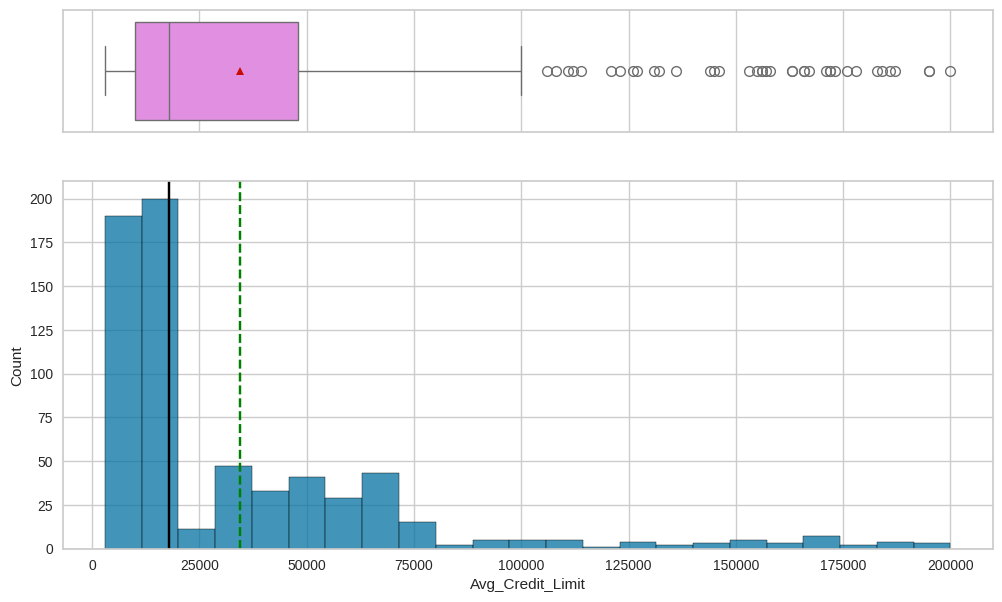

In [ ]:
histogram_boxplot(df, 'Avg_Credit_Limit')

- From the above plot we an clearly see that the Plot for `Avg_Credit_Limit` is right skewed.
- The mean value lies around 35000 and the median is 15000.
- Most of the values lie between 10000 and 45000.
- We can clearly see that there are many outliers present in the dataset.
- Most of the outliers seems to be legit and we can leave it as it is.

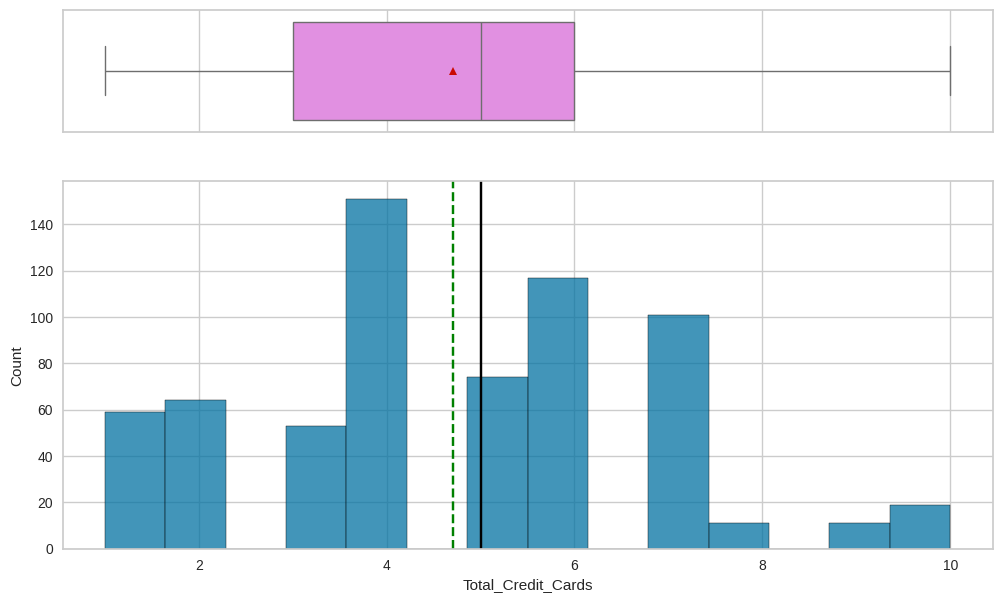

In [ ]:
histogram_boxplot(df, 'Total_Credit_Cards')

- The column `Total_Credit_Cards` have numeric values but we don't see any distribution in this.

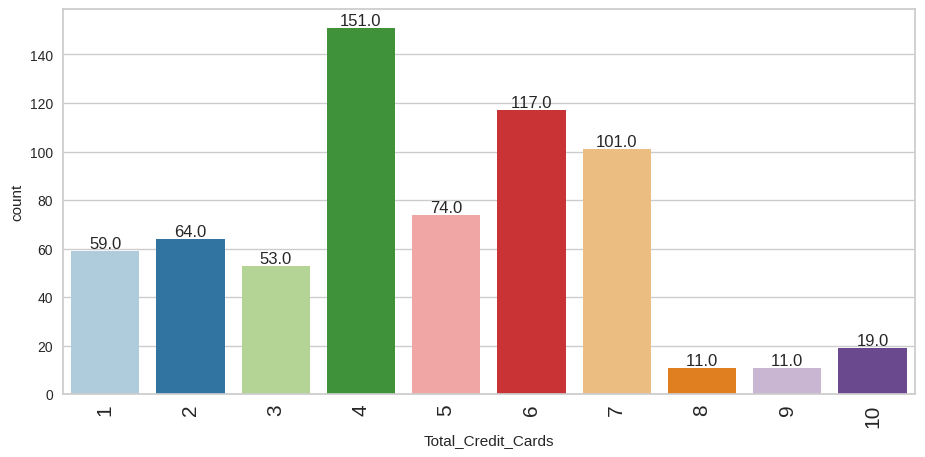

In [ ]:
labeled_barplot(df, 'Total_Credit_Cards')

- From the above graph we can conclude that 151 peoples have 4 credit cards.
- Next to it we have people with 6 credit cards with a count of 117.
- There are 101 People having 7 credit cards which is next.
- There are 74 peoples who have 5 credit cards.
- People having 2 credit cards are 64, 1 credit card are 59, 3 credit cards are 53 in count.

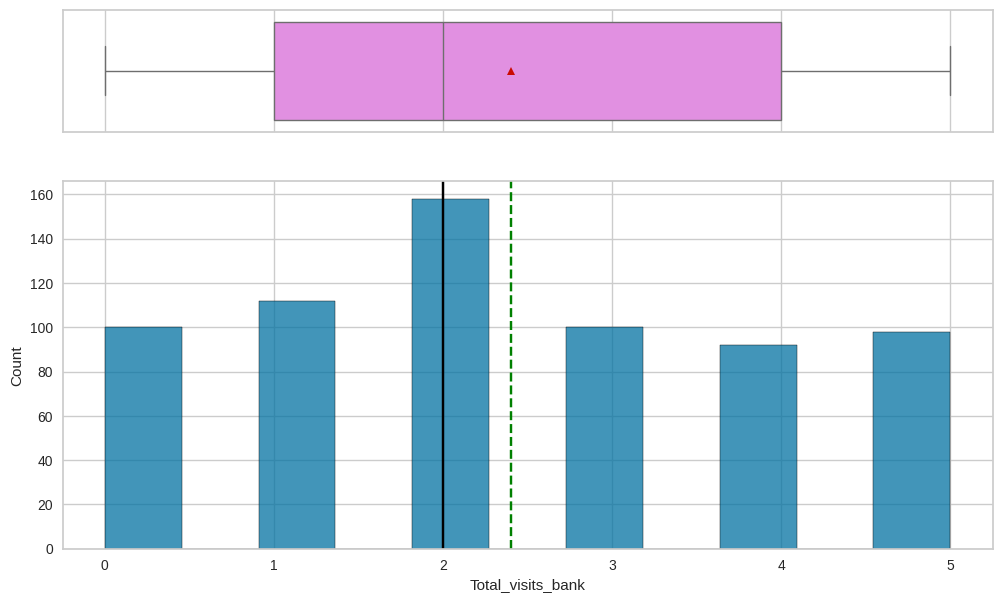

In [ ]:
histogram_boxplot(df, 'Total_visits_bank')

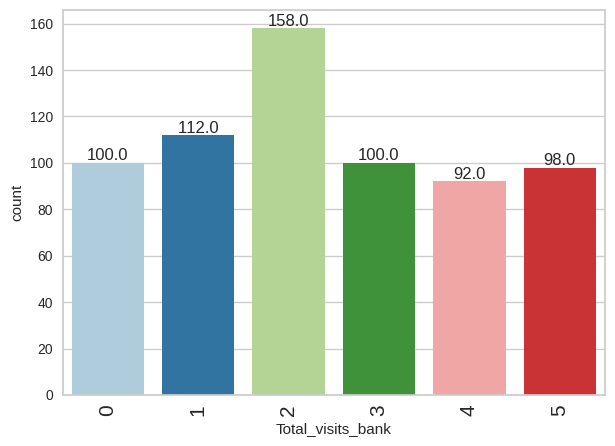

In [ ]:
labeled_barplot(df, 'Total_visits_bank')

- We have 158 people who totally visited the bank only 2 times.
- There are 112 people wo visited the bank only 1 time.
- People who never visited the bank and and people who visited the bank 3 times are similar in count of 100.
- Next to these values have `Total_visit_bank` are 4 with a count of 92 and 5 with a count of 98.

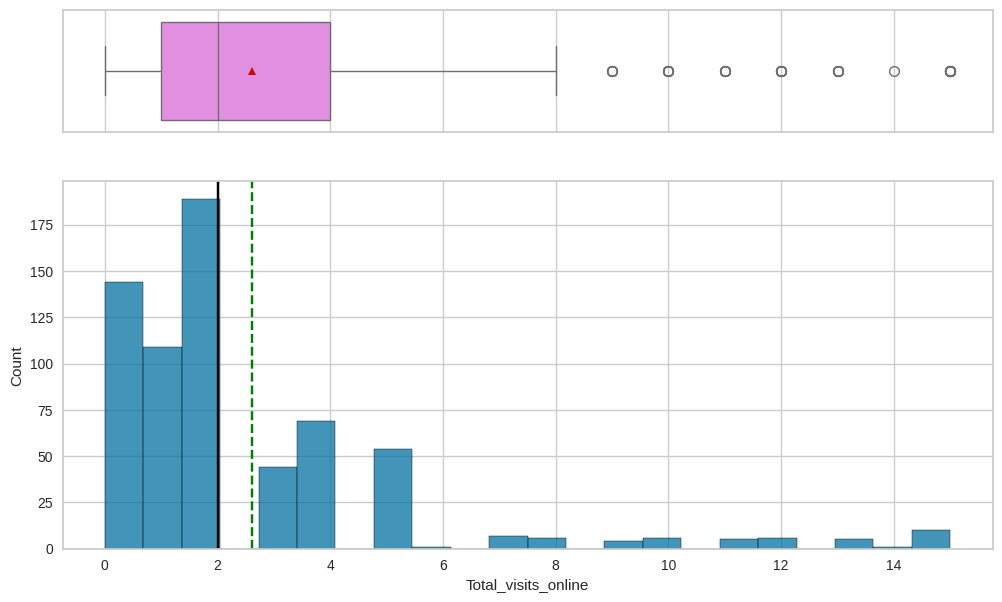

In [ ]:
histogram_boxplot(df, 'Total_visits_online')

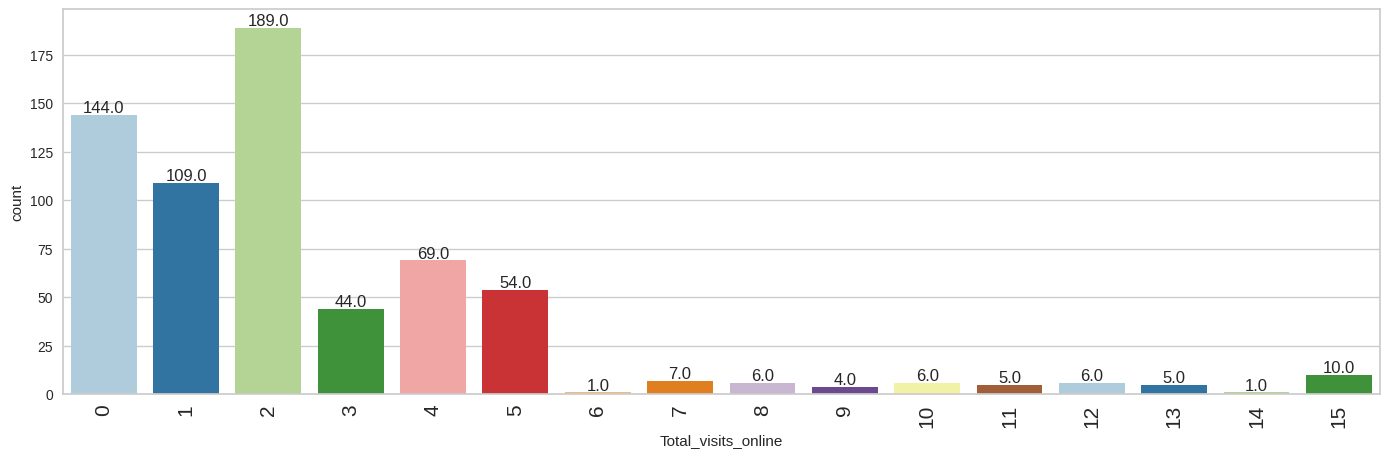

In [ ]:
labeled_barplot(df, 'Total_visits_online')

- A total of 189 people visit bank online only 2 times a year.
- There are 144 people who never visit bank online.
- Next we have customers wwho visit banks online only once a year.
- Number of customers who visit banks online 4 times are 69, who visit 5 times are 54, who visit banks online 3 times are 44.
- Remaining values are very less compared to these values, so we can conclude that people visiting the bank online is not that common.

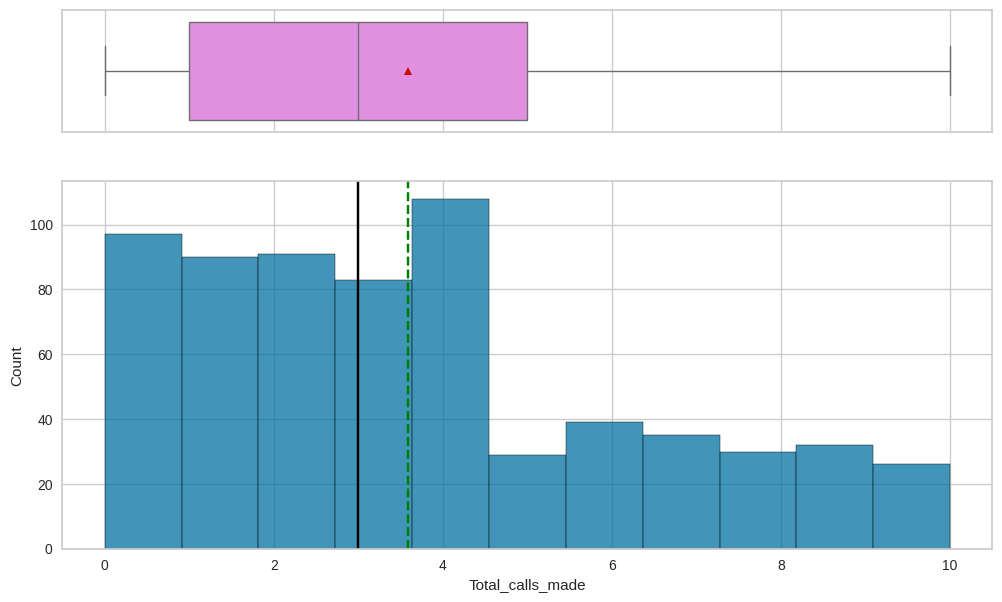

In [ ]:
histogram_boxplot(df, 'Total_calls_made')

- From the above plot we can see that the plot is slightly rght skewed.
- The mean value is 3.8, median is around 3.
- Most of the values are between 1 to 5.

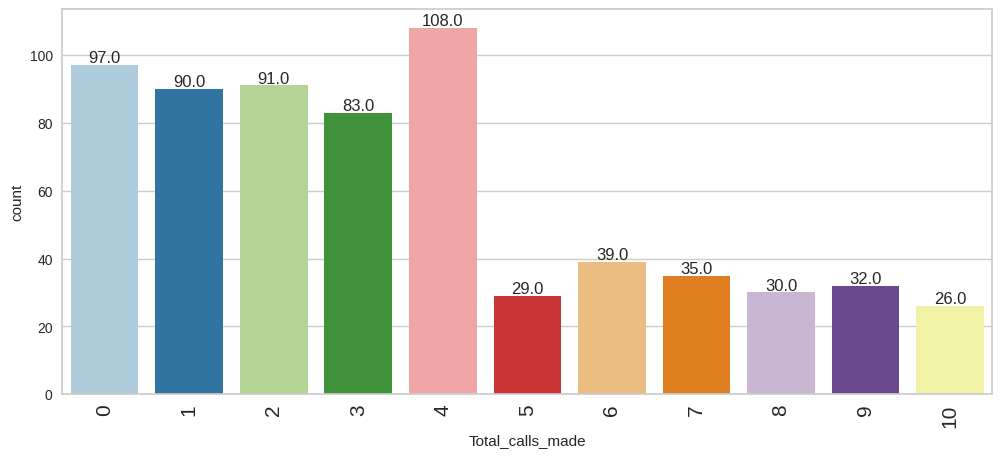

In [ ]:
labeled_barplot(df, 'Total_calls_made')

- From the above plot we can conclude that there are 108 customers who contact their bank 4 times a year.
- There are 97 customers who never contacted their bank in a year.
- There are 91 customers who contact their bank 2 times a year.
- There are 90 customers who contact their bank once a year.
- There are 83 customers who contact their bank 3 times a year.
- The remaining counts are 29 customers contact 5 times, 39 customers contact 6 times, 35 customers contact 7 times, 30 customers contact 8 times, 32 customers contact 9 times, 26 customers contact 10 times.

##Bivariate analysis

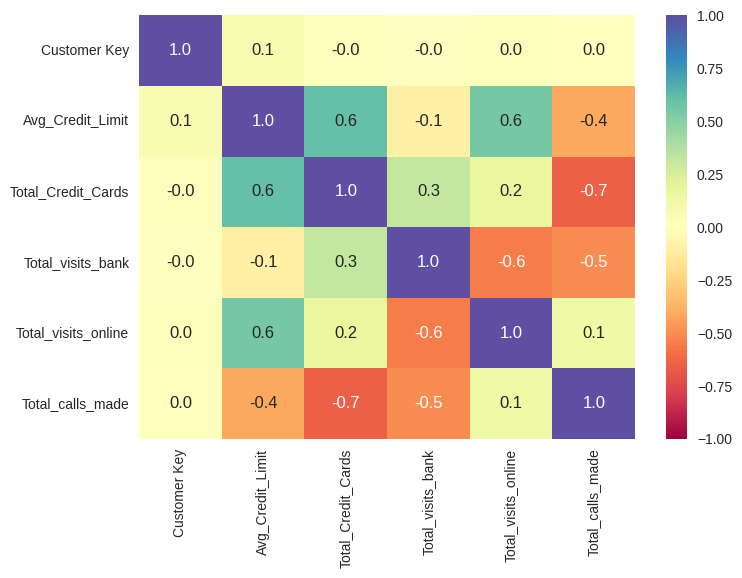

In [ ]:
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral"
)
plt.show()

- From the above heatmap we can clearly see that the `Customer Key` column doesn't have any relationship with any of the column, since it is unique value.
- We can see high relationship between `Avg_Credit_Limit` have `Total_Credit_Cards`.
- We can see a high positive relationship between `Avg_Credit_Limit` and `Total_visits_online`.
- There is a high negative relationships between `Total_call_made` and `Total_credit_cards`
- We cansee that the `Avg_Credit_Limit` and `Total_calls_made` also have a negativ correlation.
- Column `Total_calls_made` and `Total_visits_bank` also have a good negative correlation.

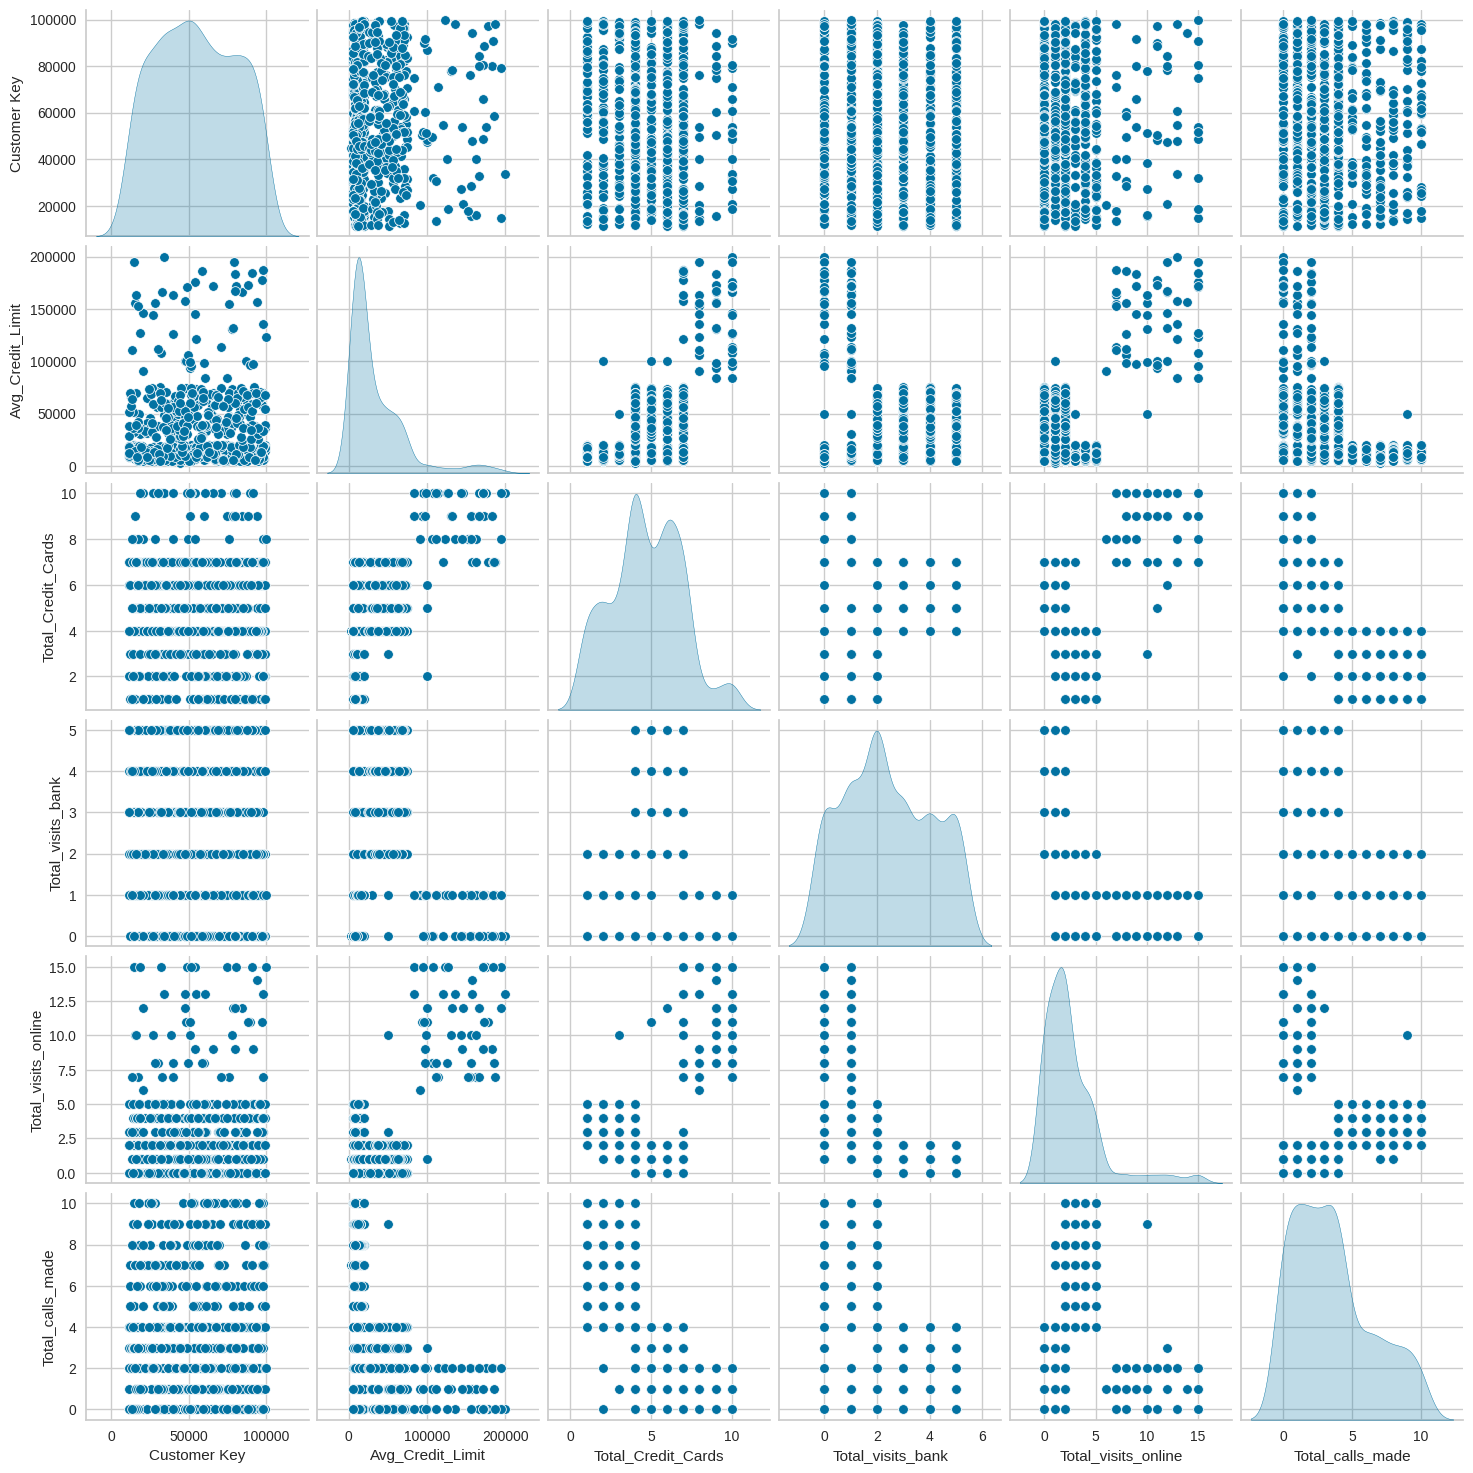

In [ ]:
sns.pairplot(df, diag_kind= 'kde' )

<Axes: xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

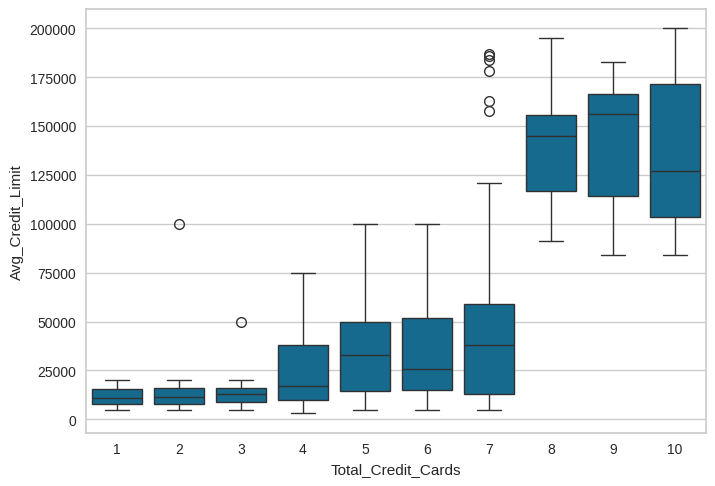

In [ ]:
sns.boxplot(data = df, x = 'Total_Credit_Cards', y = 'Avg_Credit_Limit')

- The are some outliers values in some `Total_Credit_cards` values.
- The distribution is mostly rigt skwed for all plots.
- Some values are left skewed for values 8, 9 and 10.

<Axes: xlabel='Total_visits_bank', ylabel='Avg_Credit_Limit'>

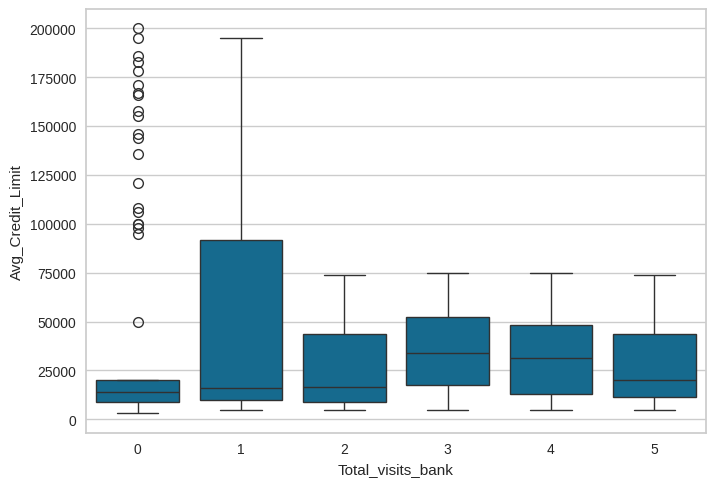

In [ ]:
sns.boxplot(data = df, x = 'Total_visits_bank', y = 'Avg_Credit_Limit')

- All the values are Right skewed here.
- There are some Outliers for 0 `Total_visits_bank` with `Avg_Credit_Limit`

<Axes: xlabel='Total_visits_online', ylabel='Total_visits_bank'>

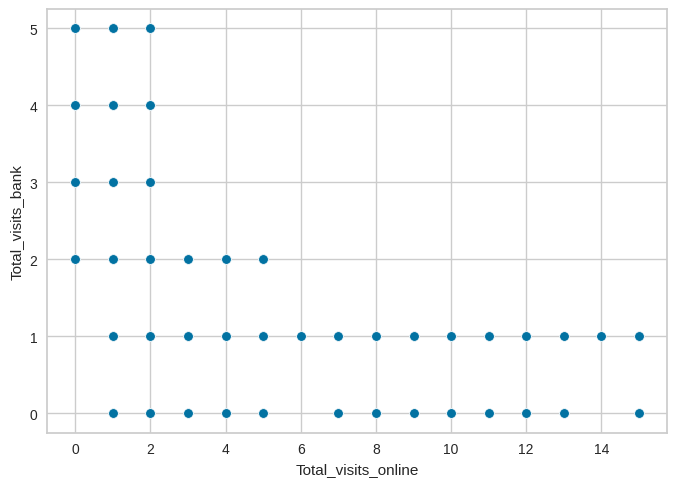

In [ ]:
sns.scatterplot(data = df, x = 'Total_visits_online', y = 'Total_visits_bank')

- This plot clearly defines that `Total_visits_bank` and `Total_visits_bank` is negatively correlated.
- If number of people visit the bank is more the number of people visiting online is less.
- They are inversely proportional.

#Data preprocessing

##Dropping Customer Key column

In [ ]:
df.drop('Customer Key', axis = 1, inplace = True)

In [ ]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


##Outlier Treatment

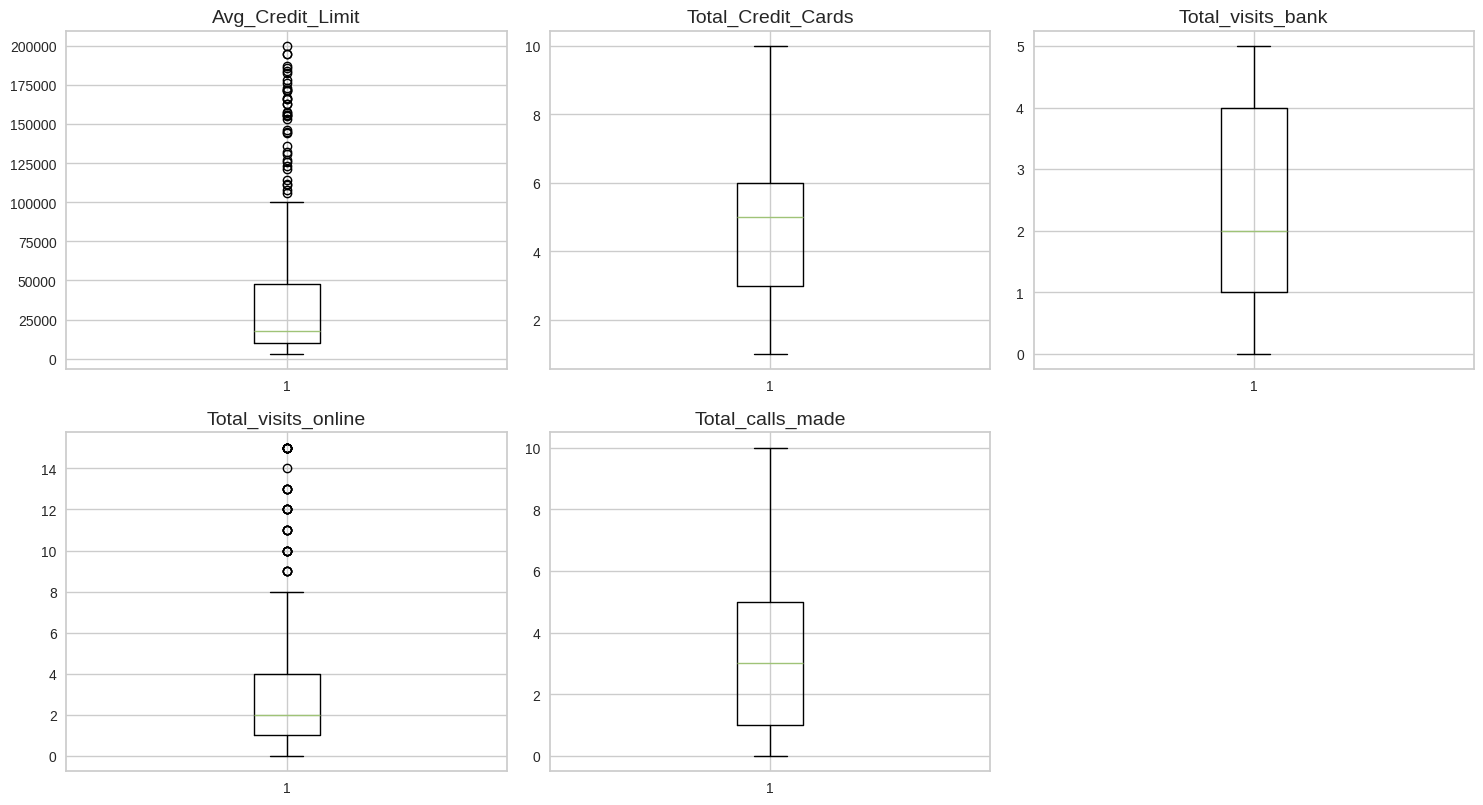

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
plt.figure(figsize=(15, 12))

for i, variable in enumerate(df):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable,fontsize=14)

plt.show()

- We have some outlier present in `Avg_Credit_Limit` but the values seems to okay and we don't neeed to do any modifications.
- we also have outliers in `Total_visits_online` column but the values 14 and 12 are okay since people visiting online portal is not a outlier. So we can leave it as it is.

##Scaling Data

In [ ]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df.copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


#Model building

## K-means

Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774463
Number of Clusters: 5 	Average Distortion: 0.9982186120996087
Number of Clusters: 6 	Average Distortion: 0.9661176079868953
Number of Clusters: 7 	Average Distortion: 0.942393215499998
Number of Clusters: 8 	Average Distortion: 0.9111420326742092


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

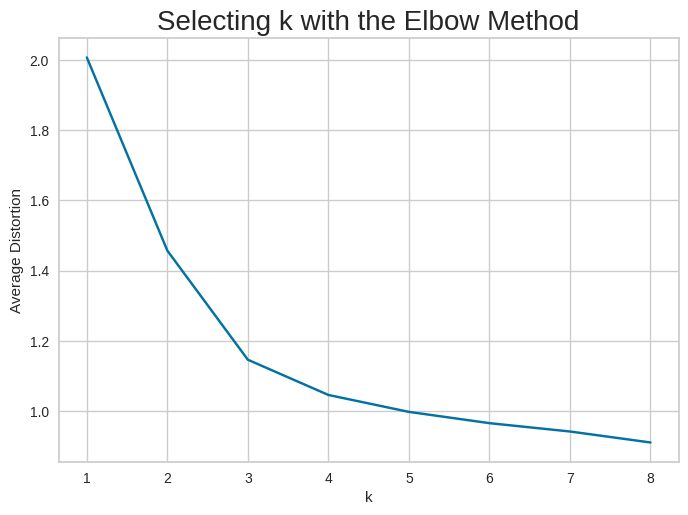

In [ ]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- From the above elbow plot we can conclude that the appropriate values for K can be 3 or 4.

### Checking Silhoutte score


For n_clusters = 2, silhouette score is 0.4975887345071433
For n_clusters = 3, silhouette score is 0.590990473596407
For n_clusters = 4, silhouette score is 0.38895131642270275
For n_clusters = 5, silhouette score is 0.276189399638482
For n_clusters = 6, silhouette score is 0.25266044697795015
For n_clusters = 7, silhouette score is 0.2520365071337397
For n_clusters = 8, silhouette score is 0.2491338458851755
For n_clusters = 9, silhouette score is 0.21264882405852512


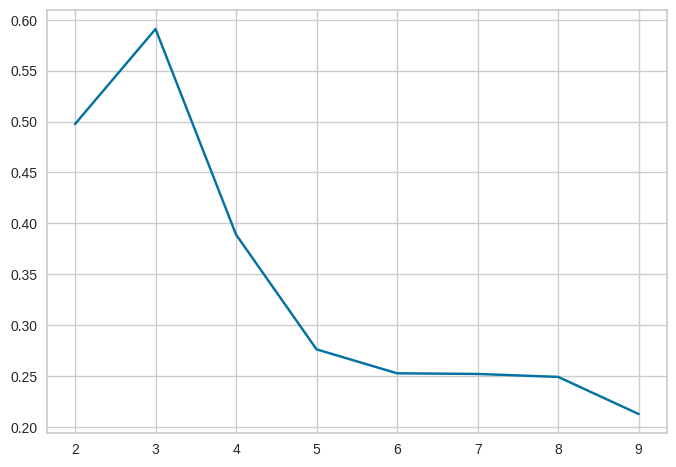

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

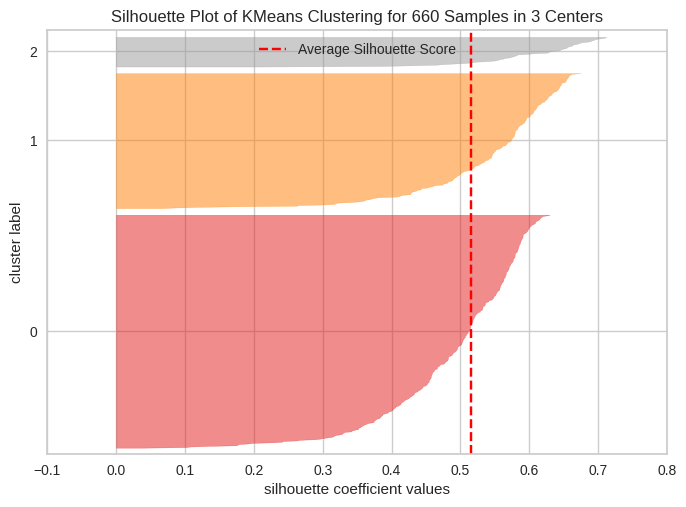

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

- Let's take 3 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 3 in the elbow curve.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df["K_means_segments"] = kmeans.labels_

### Cluster profiling

In [ ]:
cluster_profile = df.groupby("K_means_segments").mean(numeric_only = True)

In [ ]:
cluster_profile["Customer_Segement"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Customer_Segement
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


- From the above cluster profile we can say that there are 3 clusters created.
- The first cluster has 386 values, seconf cluster has 224 values and the third cluster has 50 values.

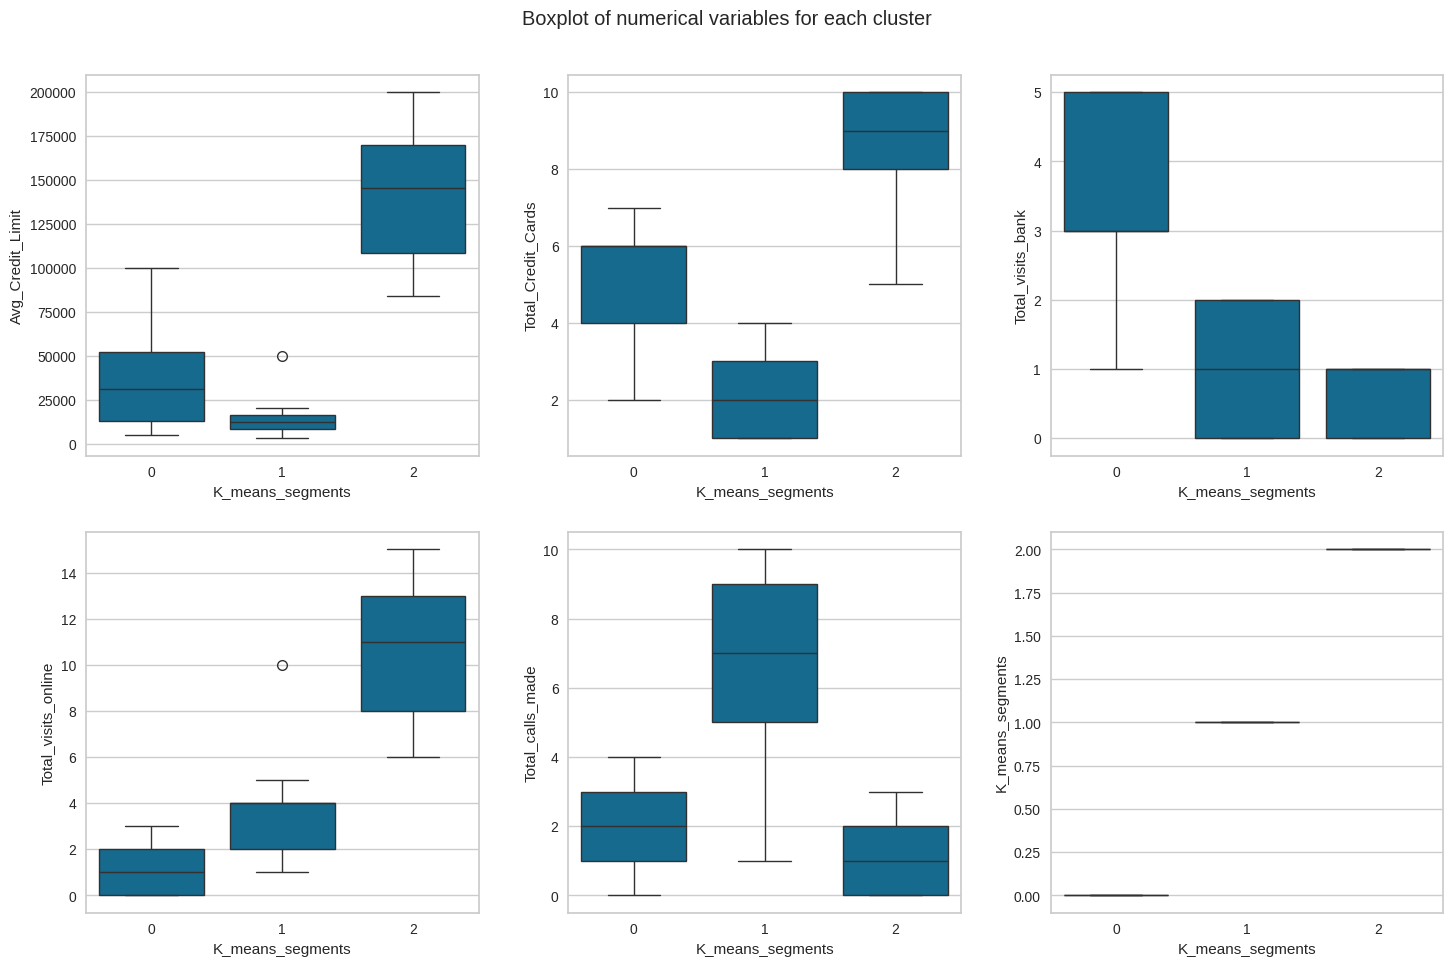

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(df):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_means_segments'>

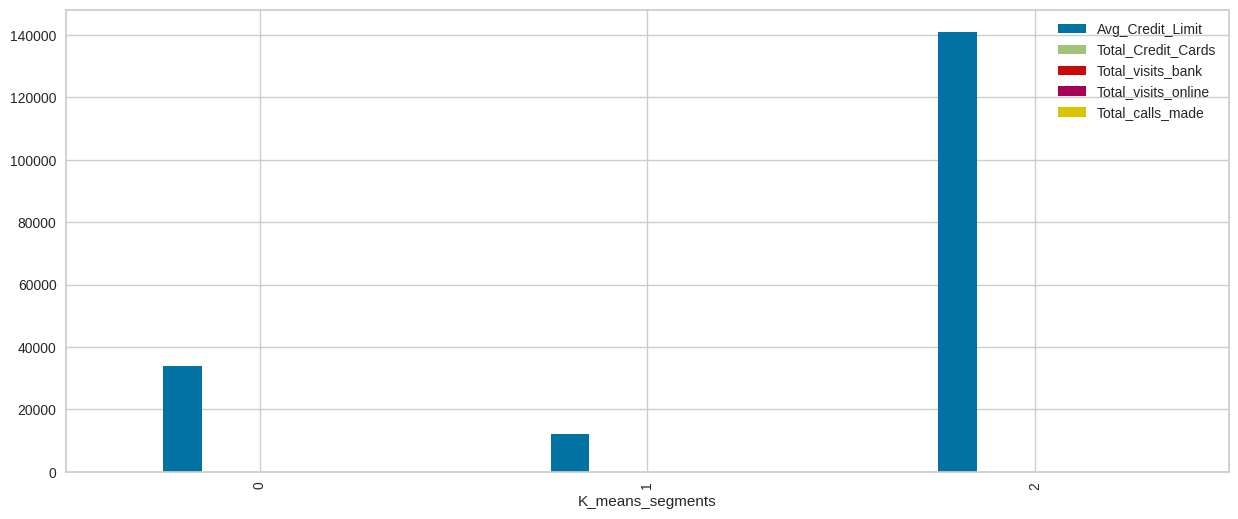

In [ ]:
df.groupby("K_means_segments").mean(numeric_only = True).plot.bar(figsize=(15, 6))


-	We can see that the clusters split for each feature in the dataset.
-	It gives the distribution of the data in the datasets with respect to the Clusters our model has predicted.
-	Cluster 2 has an obvious distinction compare to group 0 and 1.
o	Customers who have average credit limit of 75k and above are in Cluster 2.
o	Customers who have more than 7 credit cards are in Cluster 2.
o	Customers who have visited online more than 6 times are in Cluster 2.
-	Cluster 1 has less credit cards compare to other groups - 1-4 credit cards.
-	Cluster 1 has one attribute that is distinct from other group namely, customers who make calls more than 4 times.
-	Cluster 0 visited bank more than other groups - more than 2 times and up to 5 times.
-	Cluster 0 also less visited bank online compare to other Cluster.


## Hierarchical Clustering

### Checking Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


#### Exploring different linkage with Eucledean distance.

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


### Checking Dendrograms

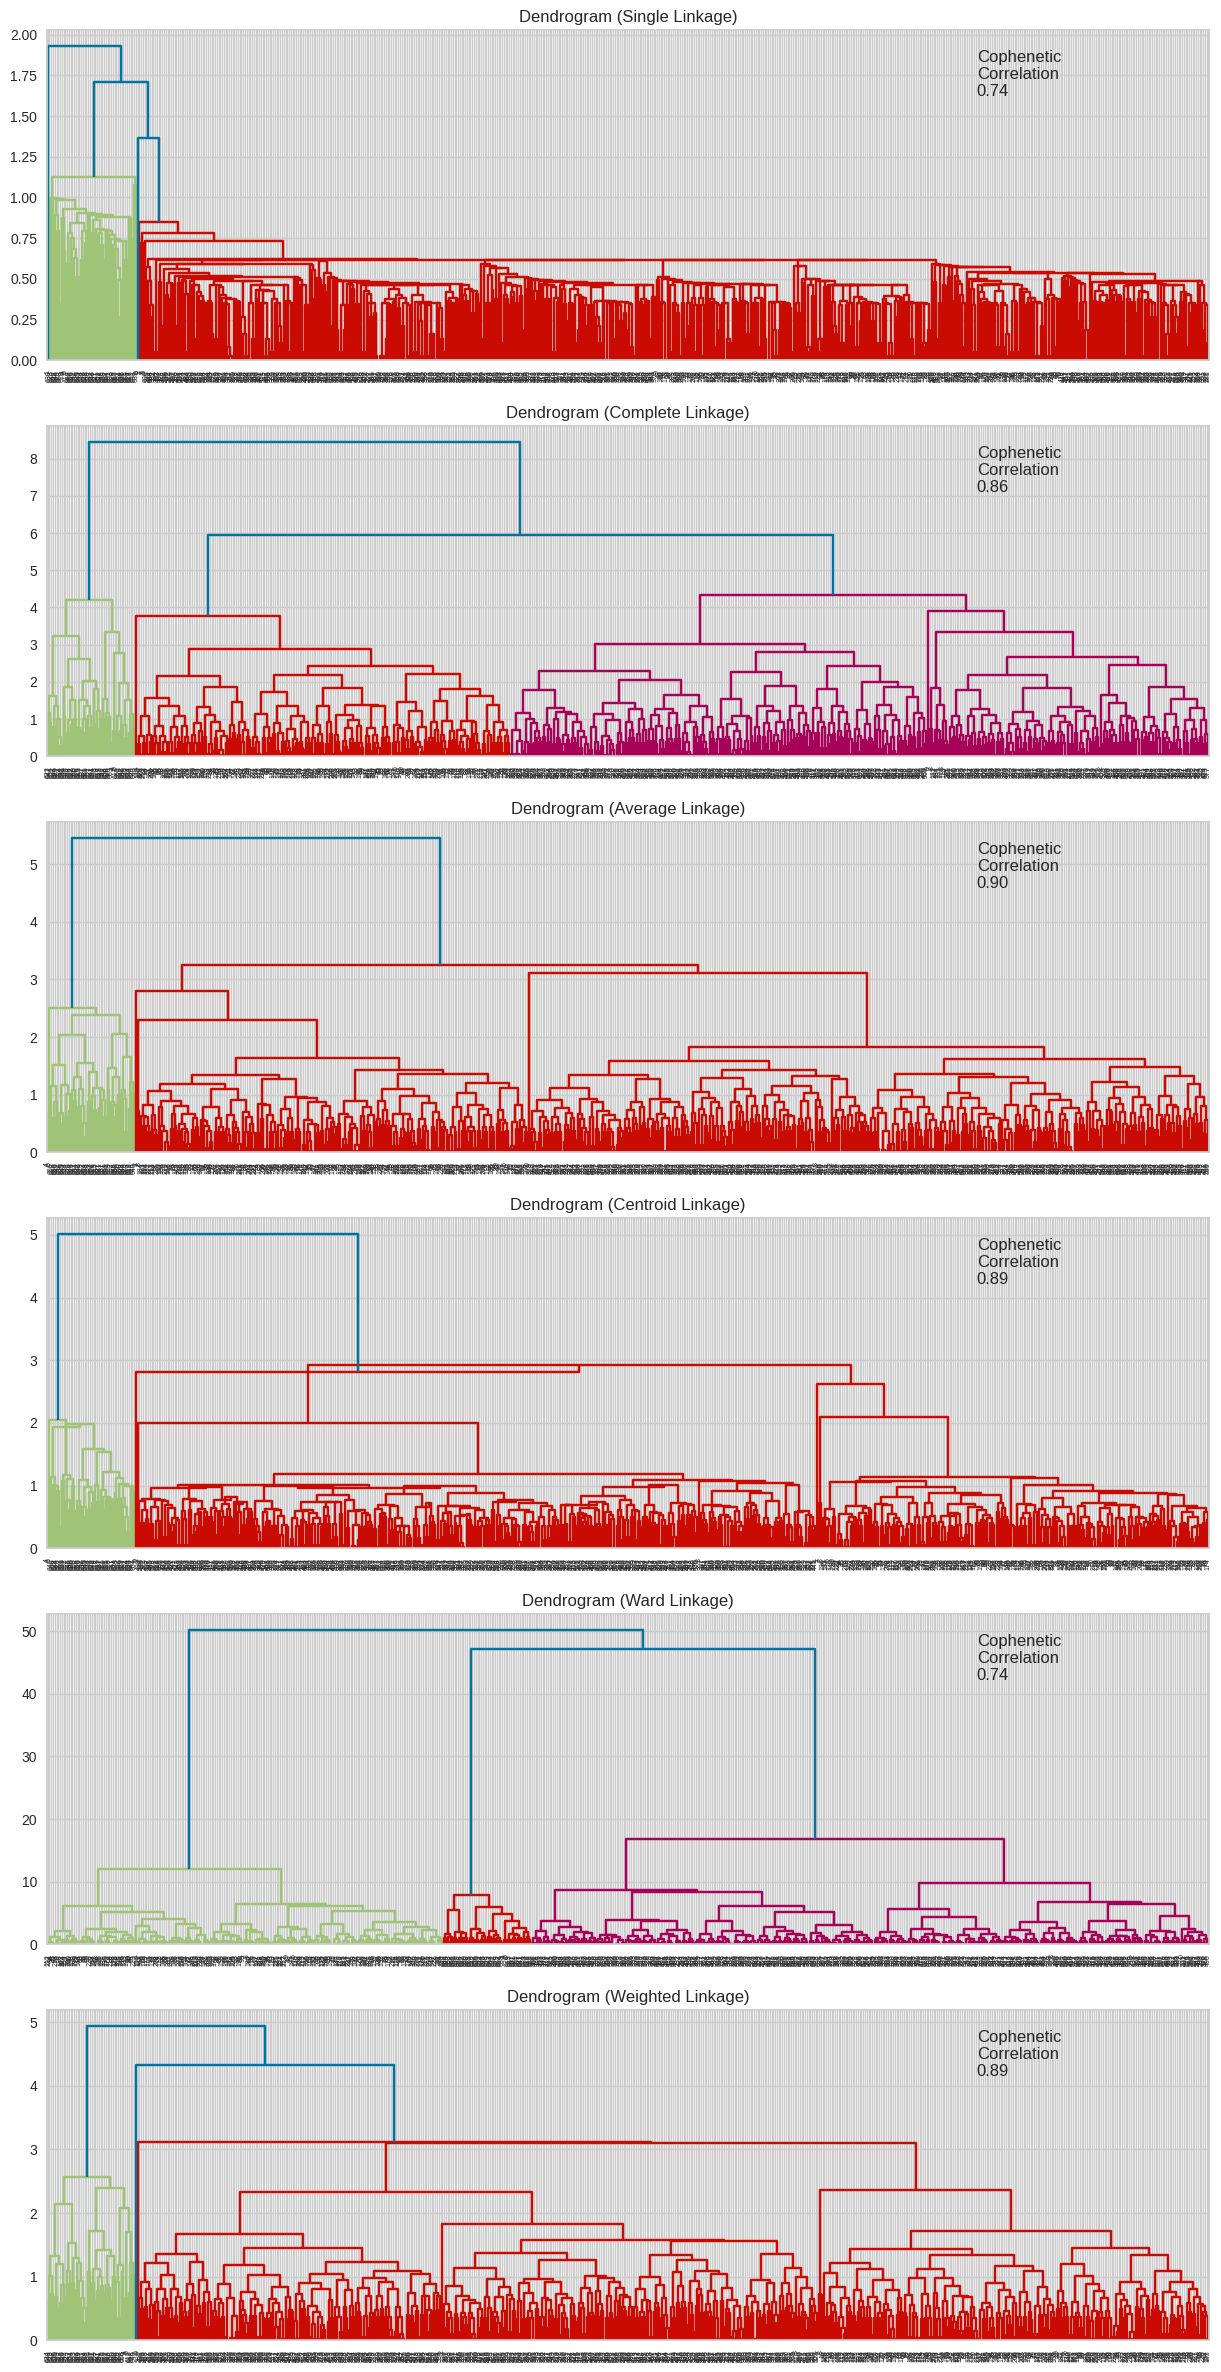

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- The cophenatic correlation is higher for Eucledean distance and Average  linkage.
- 3 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Model

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, metric= "euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
cluster_profile = df.groupby("HC_Clusters").mean(numeric_only = True)

In [ ]:
cluster_profile["Customer_segement"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [ ]:
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following Avg_Credit_Limit are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 0, the following Avg_Credit_Limit are present:
[100000  50000  30000  10000   8000  17000  19000  20000  13000  16000
  12000   5000   7000  11000   9000  18000   6000  15000  14000  73000
  49000  67000  61000  75000  48000  56000  72000  70000  51000  69000
  40000  44000  31000  37000  65000  46000  74000  58000  39000  52000
  33000  47000  71000  41000  59000  64000  45000  54000  66000  27000
  43000  36000  25000  57000  26000  38000  35000  34000  28000  63000
  29000  68000  42000  62000  32000  60000  55000]

In cluster 2, the following Avg_Credit_Limit are present:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]

In cluster 1, the following Avg_Credit_Limit are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000  97000
  98000 127000 171000 1

#Final model

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [ ]:
cluster_profile_2 = df.groupby("HC_Clusters").mean(numeric_only = True)

In [ ]:
cluster_profile_2["Customer_Segement"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [ ]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Avg_Credit_Limit"].nunique(),
        "countries in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print("-" * 100, "\n")

The 67 countries in cluster 0 are:
[100000  50000  30000  10000   8000  17000  19000  20000  13000  16000
  12000   5000   7000  11000   9000  18000   6000  15000  14000  73000
  49000  67000  61000  75000  48000  56000  72000  70000  51000  69000
  40000  44000  31000  37000  65000  46000  74000  58000  39000  52000
  33000  47000  71000  41000  59000  64000  45000  54000  66000  27000
  43000  36000  25000  57000  26000  38000  35000  34000  28000  63000
  29000  68000  42000  62000  32000  60000  55000]
---------------------------------------------------------------------------------------------------- 

The 18 countries in cluster 2 are:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]
---------------------------------------------------------------------------------------------------- 

The 43 countries in cluster 1 are:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 1

In [ ]:
# lets display cluster profile
cluster_profile_2.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,Customer_Segement
HC_Clusters,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,0.002584,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,1.000000,223


- From the above cluster profile we can say that there are 3 clusters created.
- The first cluster has 387 values, second cluster has 223 values and the third cluster has 50 values.

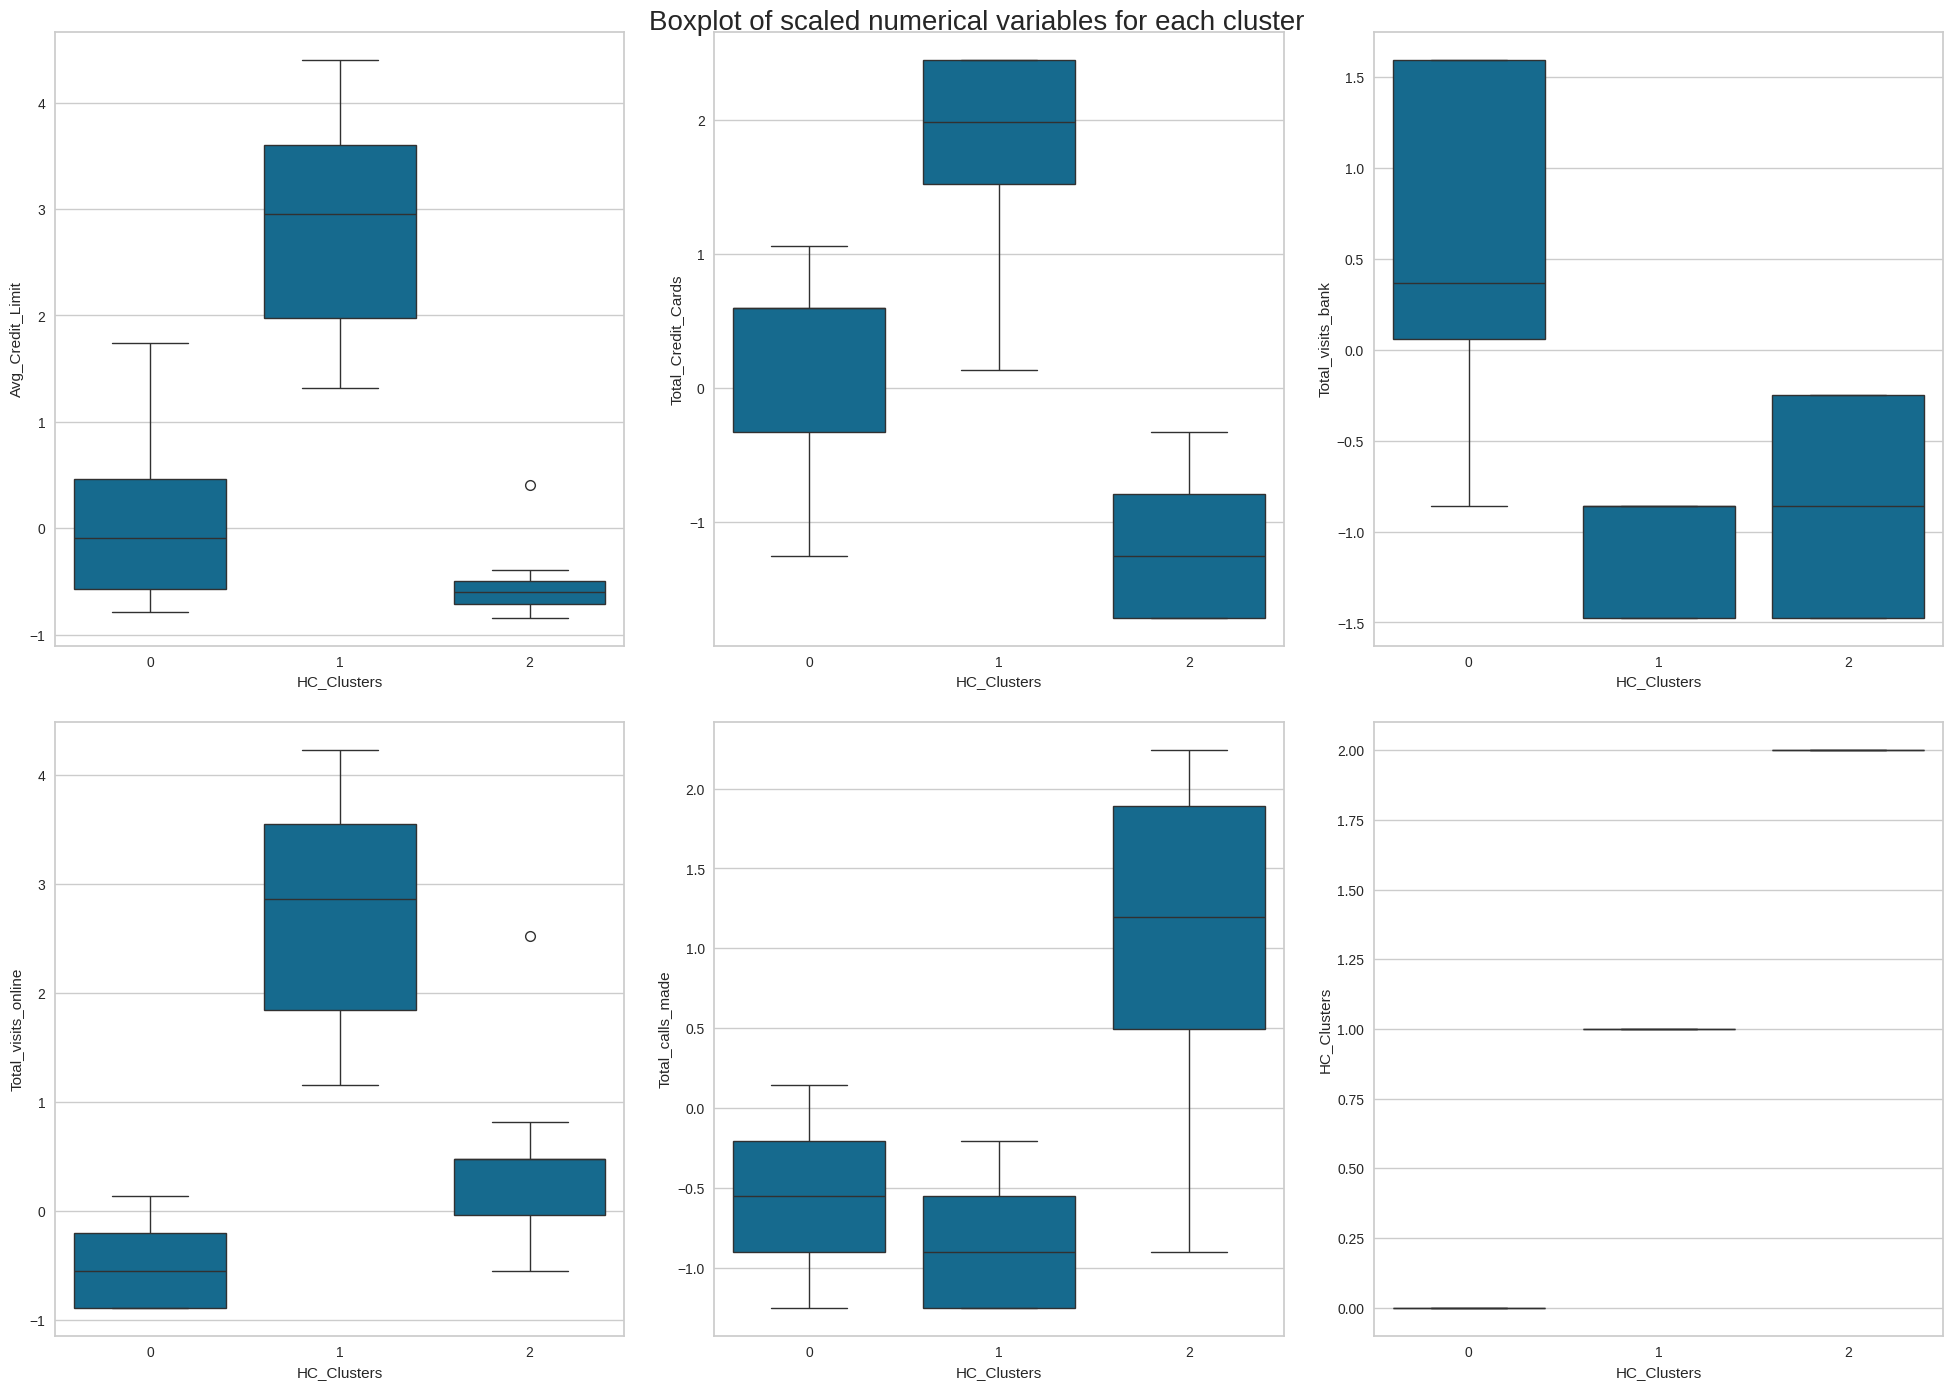

In [ ]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(subset_scaled_df):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

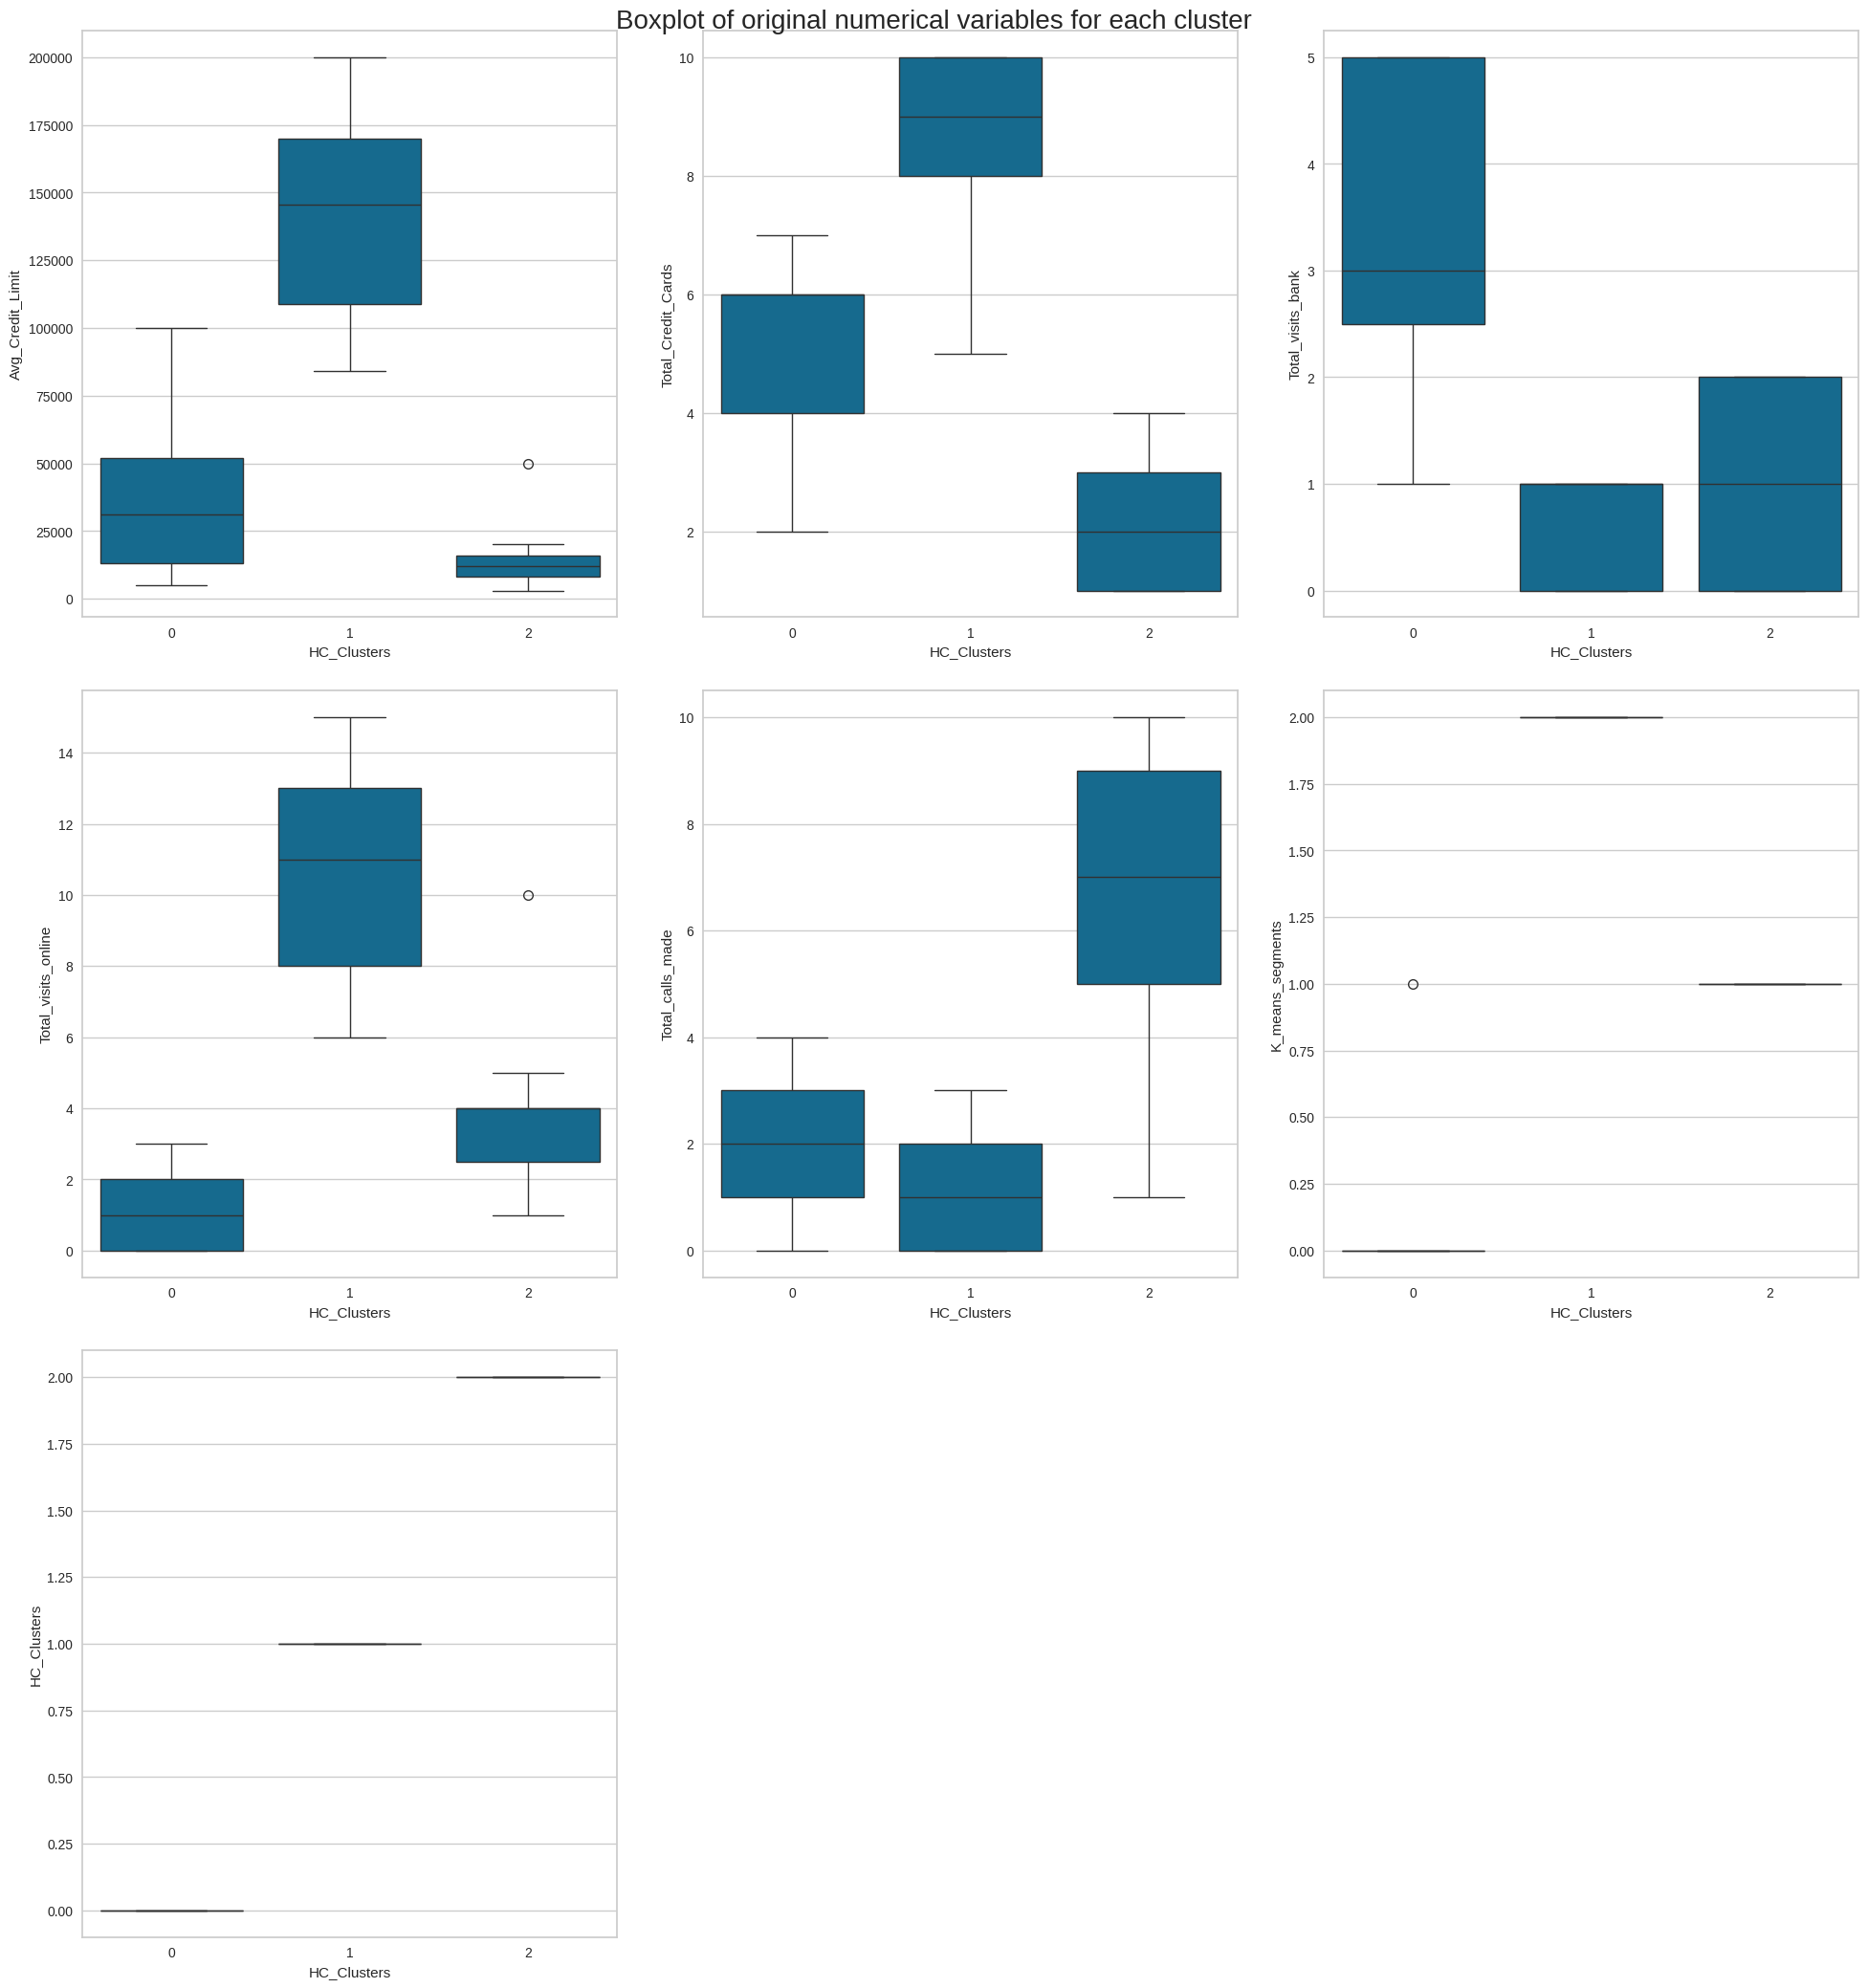

In [ ]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(df):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

#Actionable Insights
Customer Segmentation:

Customers fall into distinct groups based on credit usage, visits, and online activity. Each group shows different behaviors and preferences.
Credit Limit Outliers:

Some customers have unusually high or low credit limits, indicating opportunities for personalized offers.
Engagement Patterns:

Some customers prefer online banking, while others visit branches more frequently. Tailor communication and services accordingly.
At-Risk Customers:

Low-engagement clusters (few visits or calls) might be at risk of churn.
Cross-Sell Opportunities:

Certain high-usage segments offer potential for upselling other products, such as loans or premium services.

#Business Report: Credit Card Customer Analysis
####Summary
Unsupervised learning identified key customer segments based on behaviors like credit card usage, bank visits, and online activity. These insights enable targeted marketing, product development, and customer retention strategies.

###Key Insights
Customer Segmentation: Distinct customer groups emerged, providing clarity on high and low credit users, frequent bank visitors, and online users.

Outliers: Some customers with extreme credit limits present opportunities for customized service offerings.

Engagement Preferences: Clear division between customers who prefer digital vs. in-person banking.

Retention Risks: Lower engagement clusters may need targeted retention efforts.
Cross-Selling Potential: High-usage customers are primed for cross-selling financial products.

Recommendations

Personalized Marketing: Tailor campaigns to each segment’s needs (e.g., rewards for high-credit users, incentives for low-credit users).

Retention Strategy: Focus on re-engaging low-engagement customers with special offers or improved service.

Optimize Digital Channels: Invest in digital platforms for online-focused customers; enhance in-branch experiences for others.

Outlier Opportunities: Offer personalized financial services to high-credit limit customers; consider credit increases for others.

Product Customization: Create tailored credit card products based on customer usage patterns.